# **Statystyczna analiza danych treningowych użytkowników siłowni**


# 1 Charakterystyka danych źródłowych oraz określenie celu analizy.

Niniejszy projekt opiera się na zbiorze danych zawierającym **informacje o użytkownikach siłowni** – ich cechach demograficznych, parametrach fizjologicznych oraz nawykach treningowych. Dane obejmują 973 obserwacje, zawierające m.in. wiek, płeć, wagę, wzrost, poziom doświadczenia, częstotliwość i typ treningów, a także takie wskaźniki wydolności jak tętno, spalone kalorie czy czas trwania sesji, zgodnie z poniższa tabela.

| Nazwa pola                  | Opis                                                                 |
|----------------------------|----------------------------------------------------------------------|
| Wiek                       | Wiek użytkownika siłowni                                             |
| Płeć                       | Płeć użytkownika siłowni (mężczyzna lub kobieta)                     |
| Waga (kg)                  | Waga członka w kilogramach                                           |
| Wzrost (m)                 | Wzrost użytkownika w metrach                                         |
| Max_BPM                    | Maksymalne tętno (uderzenia na minutę) podczas sesji treningowych   |
| Avg_BPM                    | Średnie tętno podczas sesji treningowych                            |
| Resting_BPM                | Tętno w spoczynku przed treningiem                                  |
| Session_Duration (hours)   | Czas trwania każdej sesji treningowej w godzinach                   |
| Calories_Burned            | Całkowita liczba kalorii spalonych podczas każdej sesji             |
| Workout_Type               | Rodzaj wykonanego treningu (np. kardio, siłowy, joga, HIIT)         |
| Fat_Percentage             | Procent tkanki tłuszczowej użytkownika                              |
| Water_Intake (liters)      | Dzienne spożycie wody podczas treningu                              |
| Workout_Frequency (days/week) | Liczba sesji treningowych w tygodniu                           |
| Experience_Level           | Poziom doświadczenia, od początkującego (1) do eksperta (3)         |
| BMI                        | Wskaźnik masy ciała, obliczany na podstawie wzrostu i wagi          |

**Celem analizy** jest **identyfikacja wzorców zachowań i zależności** pomiędzy cechami fizycznymi, demograficznymi oraz parametrami treningowymi użytkowników siłowni. W szczególności analiza ma na celu odpowiedź na następujące pytania:
- Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?
- Co najbardziej wpływa na liczbę spalanych kalorii?
- Czy kobiety częściej wybierają jogę?
- Czy picie większej ilości wody oznacza dłuższy trening?
- Jakie są typowe profile użytkowników siłowni – i czym się różnią?

# 2 Przegląd danych

## 2.1 Wczystanie oraz zapoznanie się z danymi

In [2]:
# Importowanie bibliotek
import numpy as np            # Obsługa operacji numerycznych i macierzy
import pandas as pd           # Praca z danymi tabelarycznymi w formie DataFrame
import seaborn as sns         # Wizualizacje statystyczne oparte na matplotlib
import missingno as msno
import matplotlib.pyplot as plt  # Tworzenie wykresów i rysunków

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
# wczytanie danych
df = pd.read_csv('silownia_new.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [5]:
# kształt DataFrame
df.shape

(973, 15)

In [6]:
# typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
# sprawdzenie brakujcych wartości w każdej kolumnie
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

Zbiór danych składa się z 973 obserwacji oraz 15 zmiennych, obejmujących zarówno **cechy ilościowe** (float64, int64), jak i **jakościowe** (object). Zmienne kategoryczne to Gender (płeć) oraz Workout_Type (rodzaj treningu). Większość zmiennych nie zawiera braków, z wyjątkiem Age, Workout_Type, BMI. Pozostałe kolumny są kompletne

## 2.2 Diagnostyka danych

### 2.2.1 Braki danych (missing values)

In [8]:
# braki danych procentowo w każdej kolumnie
(df.isna().sum() / len(df)) * 100

Age                              10.277492
Gender                            0.000000
Weight (kg)                       0.000000
Height (m)                        0.000000
Max_BPM                           0.000000
Avg_BPM                           0.000000
Resting_BPM                       0.000000
Session_Duration (hours)          0.000000
Calories_Burned                   0.000000
Workout_Type                     15.416238
Fat_Percentage                    0.000000
Water_Intake (liters)             0.000000
Workout_Frequency (days/week)     0.000000
Experience_Level                  0.000000
BMI                              15.416238
dtype: float64

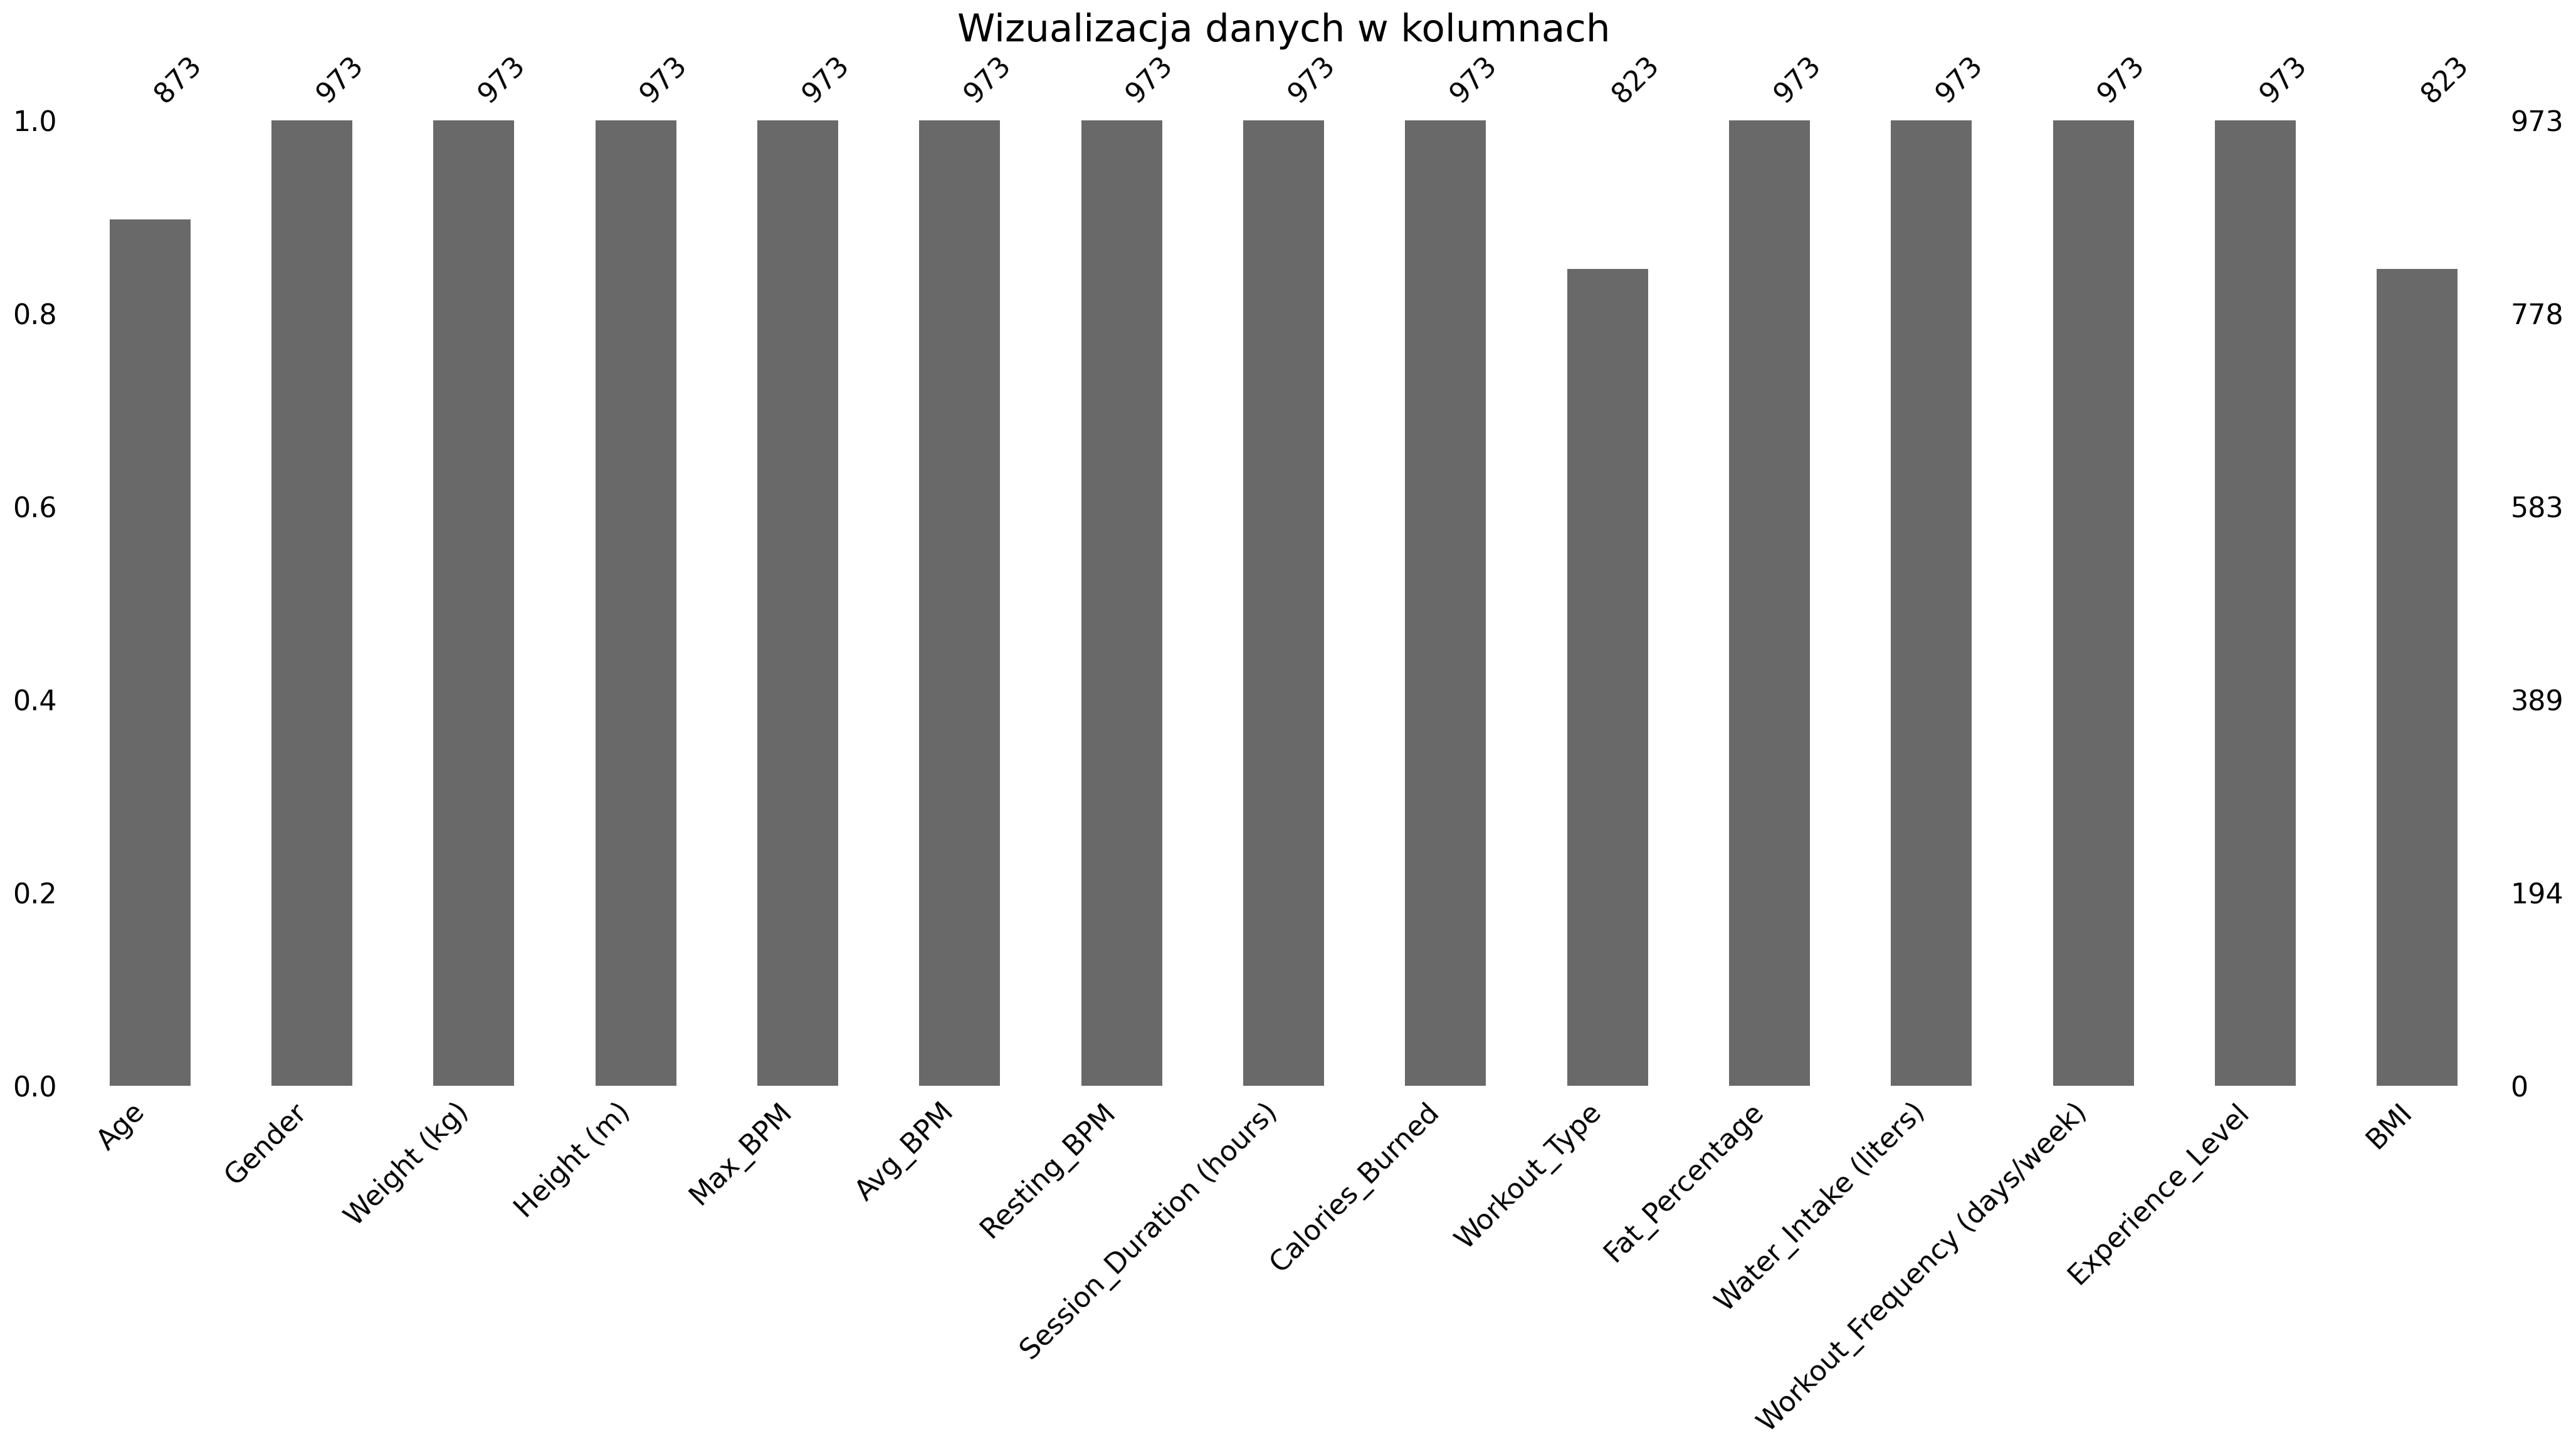

In [9]:
msno.bar(df)
plt.title("Wizualizacja danych w kolumnach", size=22)
plt.show()

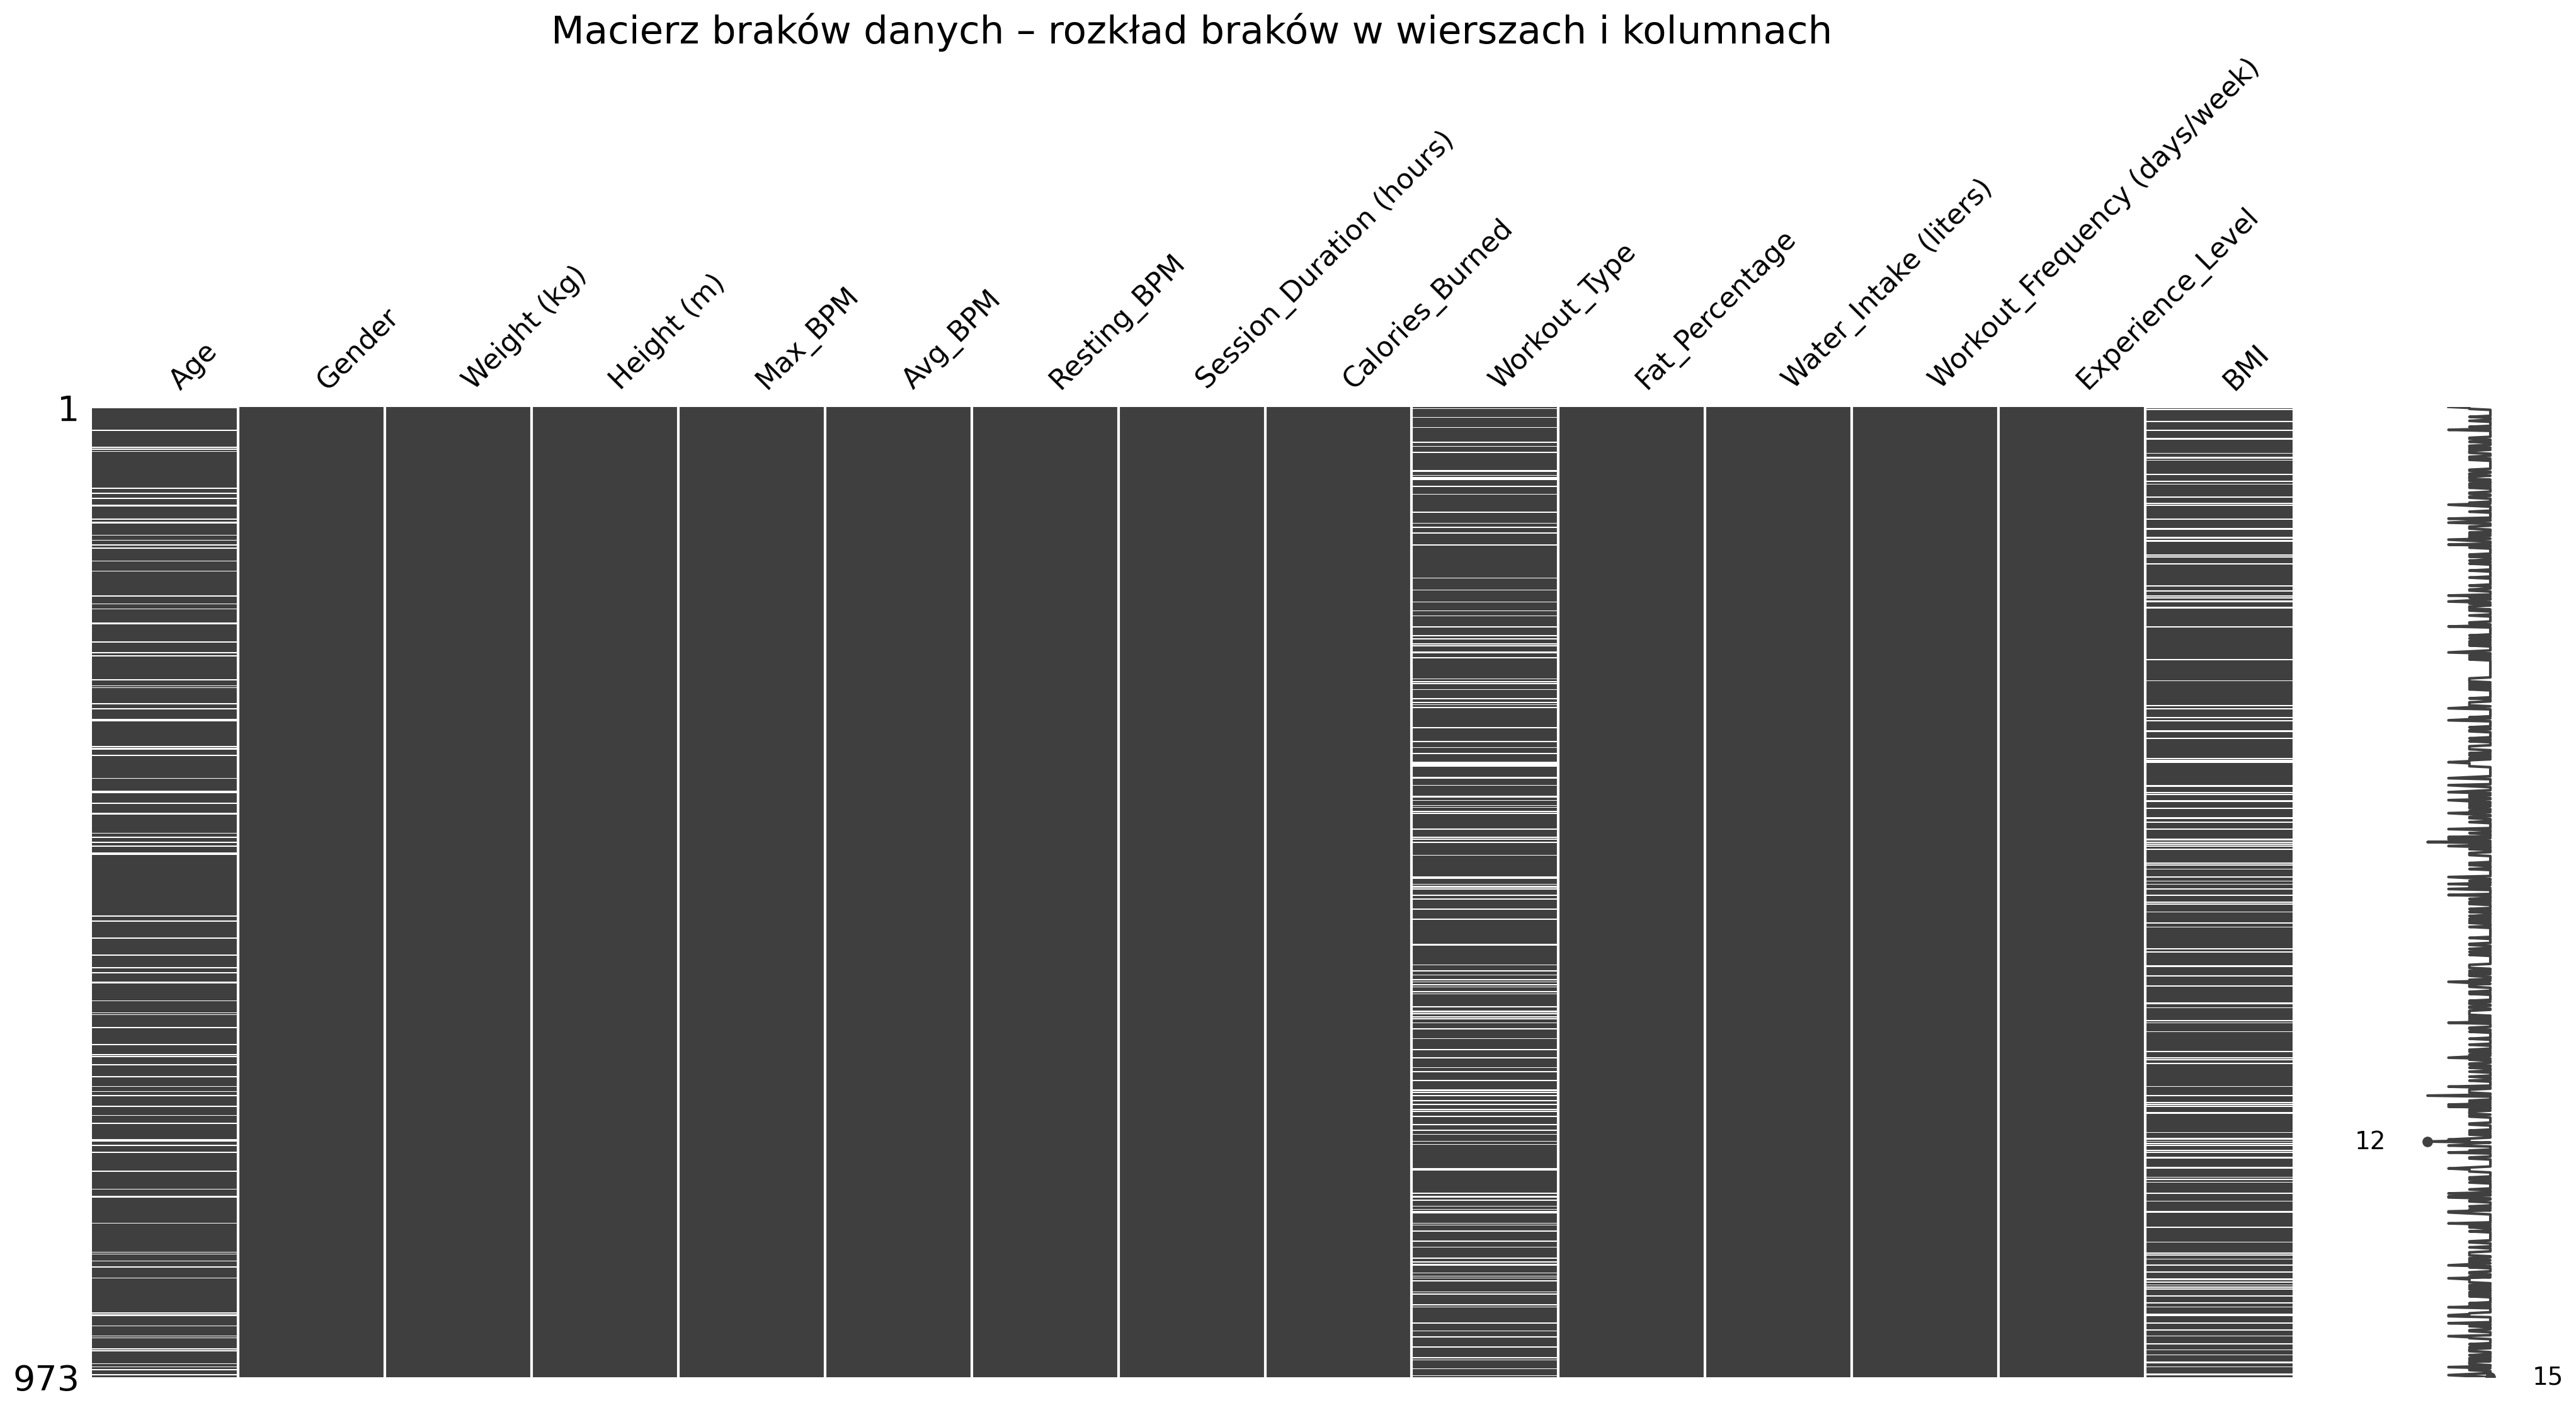

In [10]:
# Rozkład braków na poziomie wierszy
msno.matrix(df)
plt.title('Macierz braków danych – rozkład braków w wierszach i kolumnach', size=22);

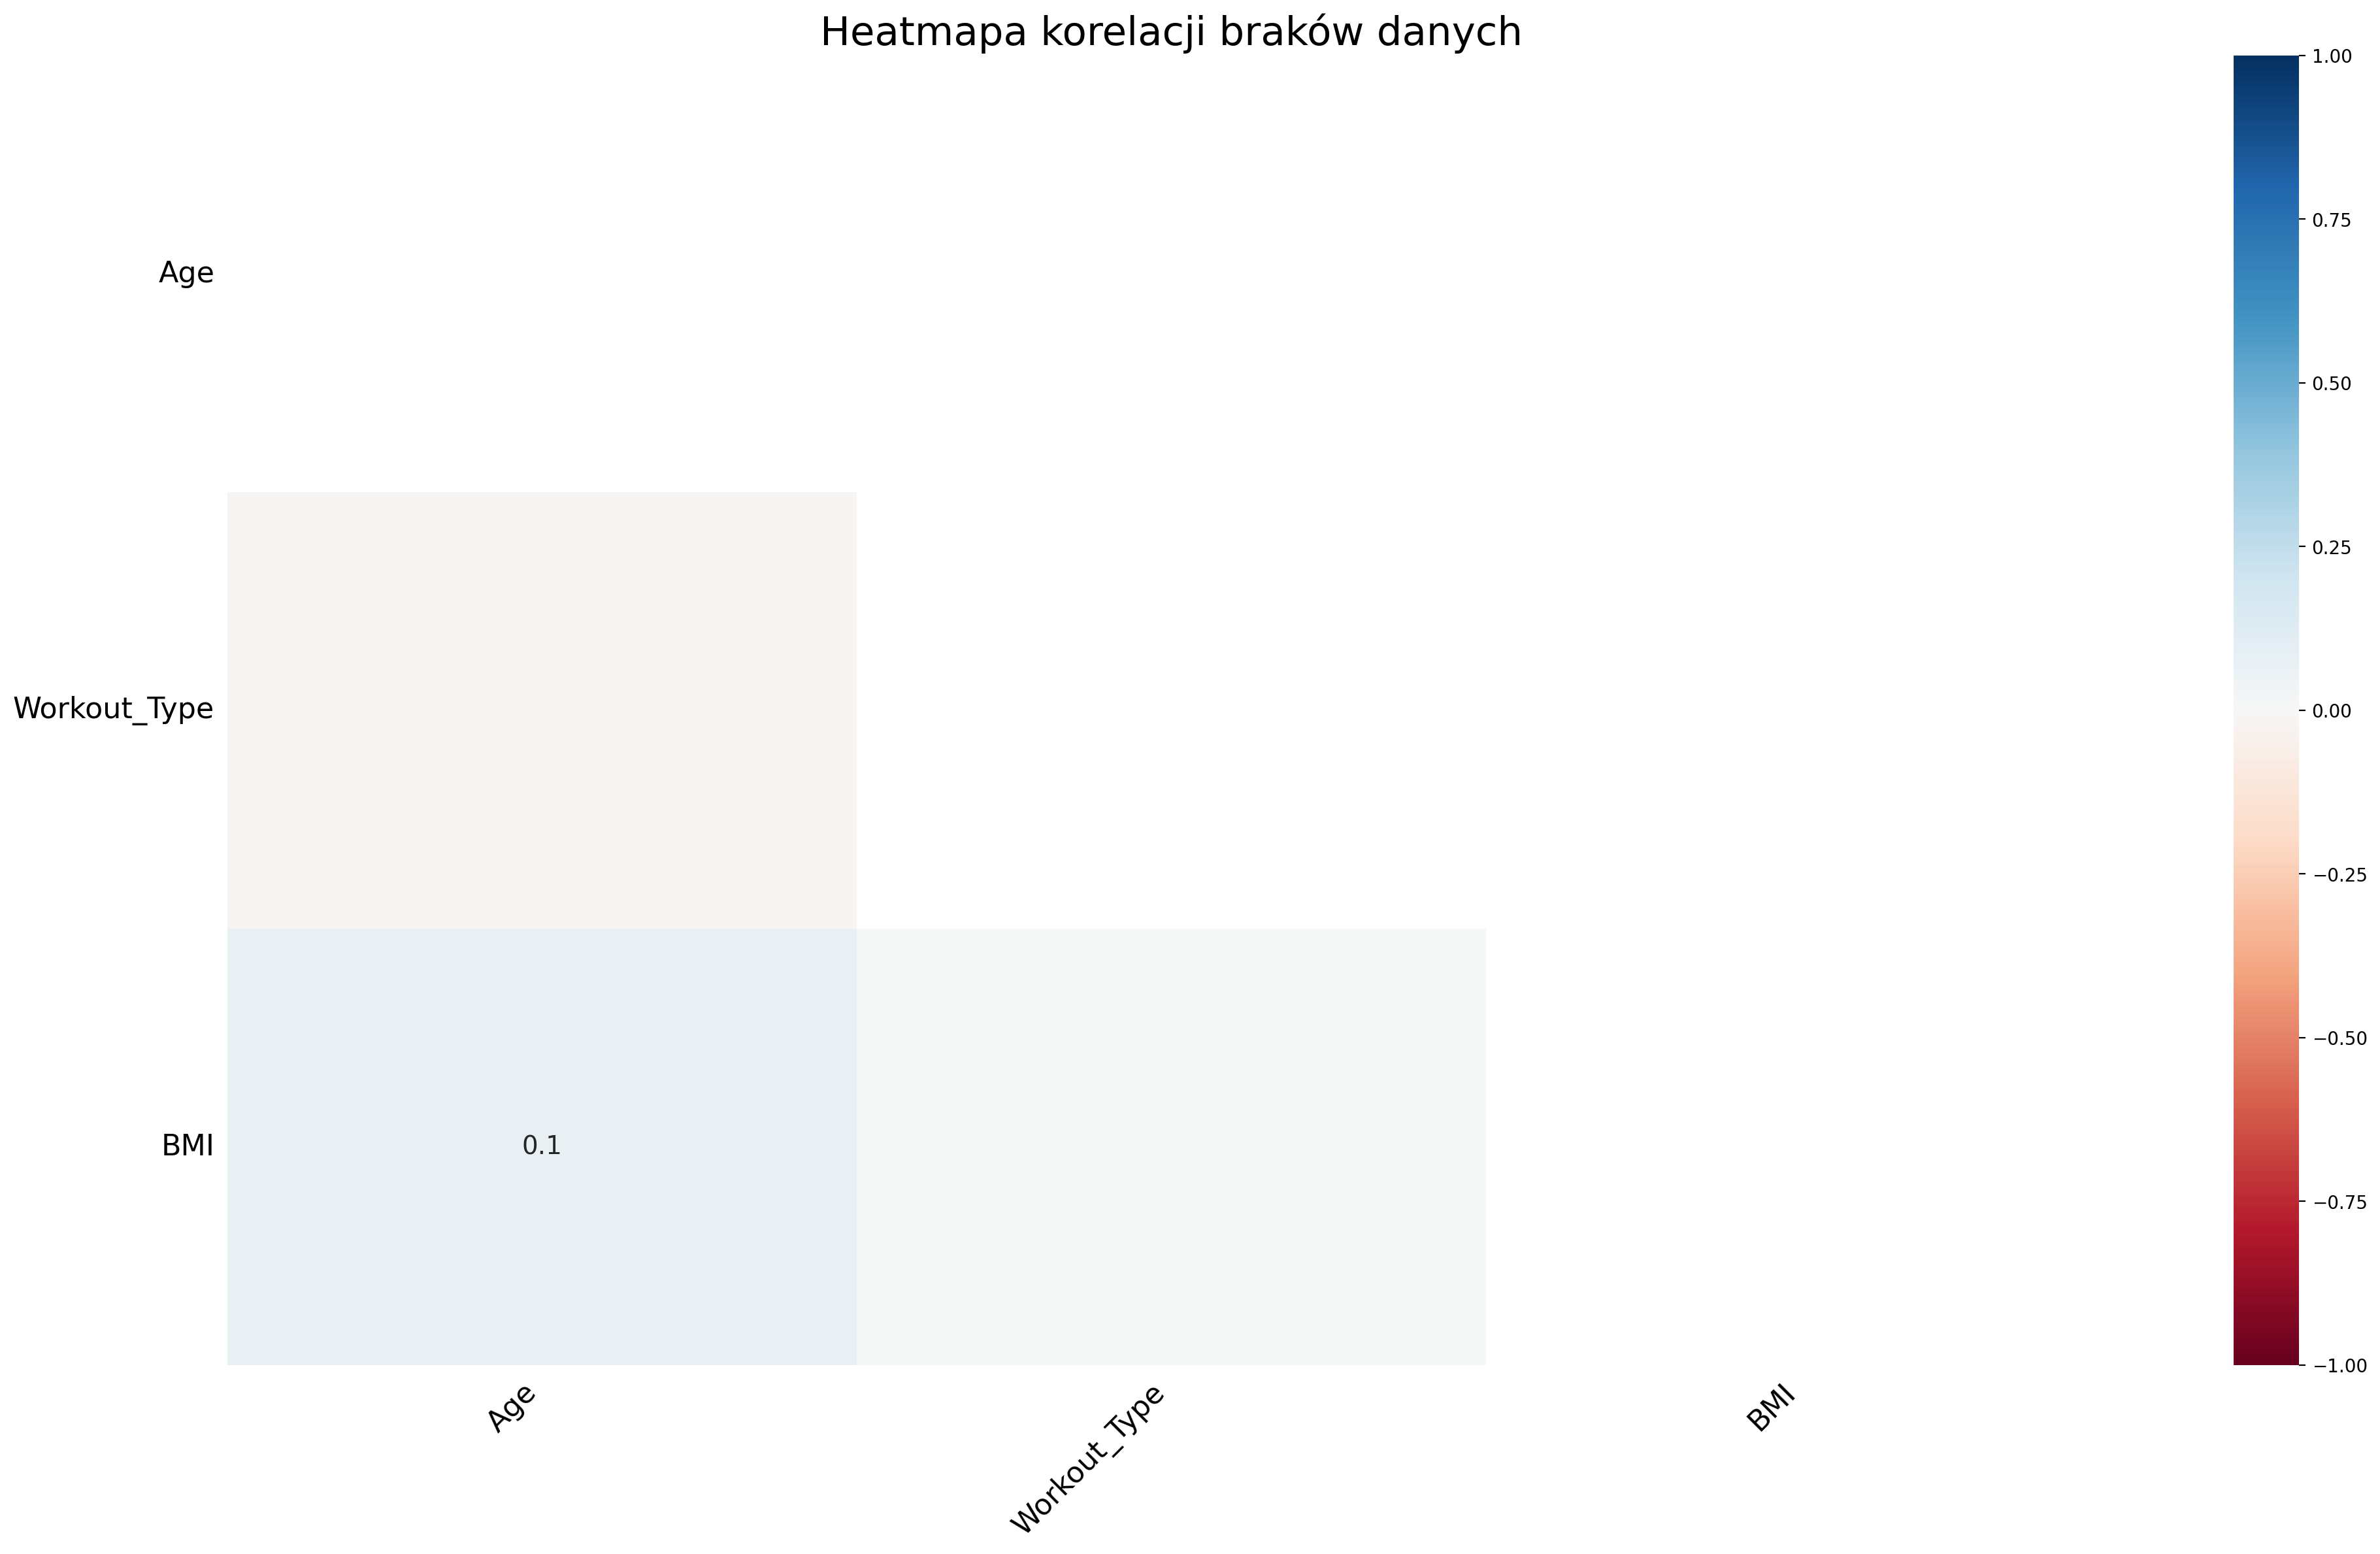

In [11]:
# Mapa korelacji braków
msno.heatmap(df)
plt.title("Heatmapa korelacji braków danych", size=22)
plt.tight_layout()
plt.show()

**Słaba dodatnia korelacja braków pomiędzy Age oraz BMI** – lekka tendencja do współwystępowania braków.
Gdy wiersz w kolumnie Age ma brakującą warść to istnieje nieco podwyższone prawdopodobieństwo, że brakuje także BMI.
Inne kolumny mają korelację bliską 0 co oznacza, że braki w nich są niezależne od siebie (brak danych w jednej kolumnie nie wpływa na wystąpienie braków w innych).

Text(0.5, 1.0, 'Dendogram braków danych')

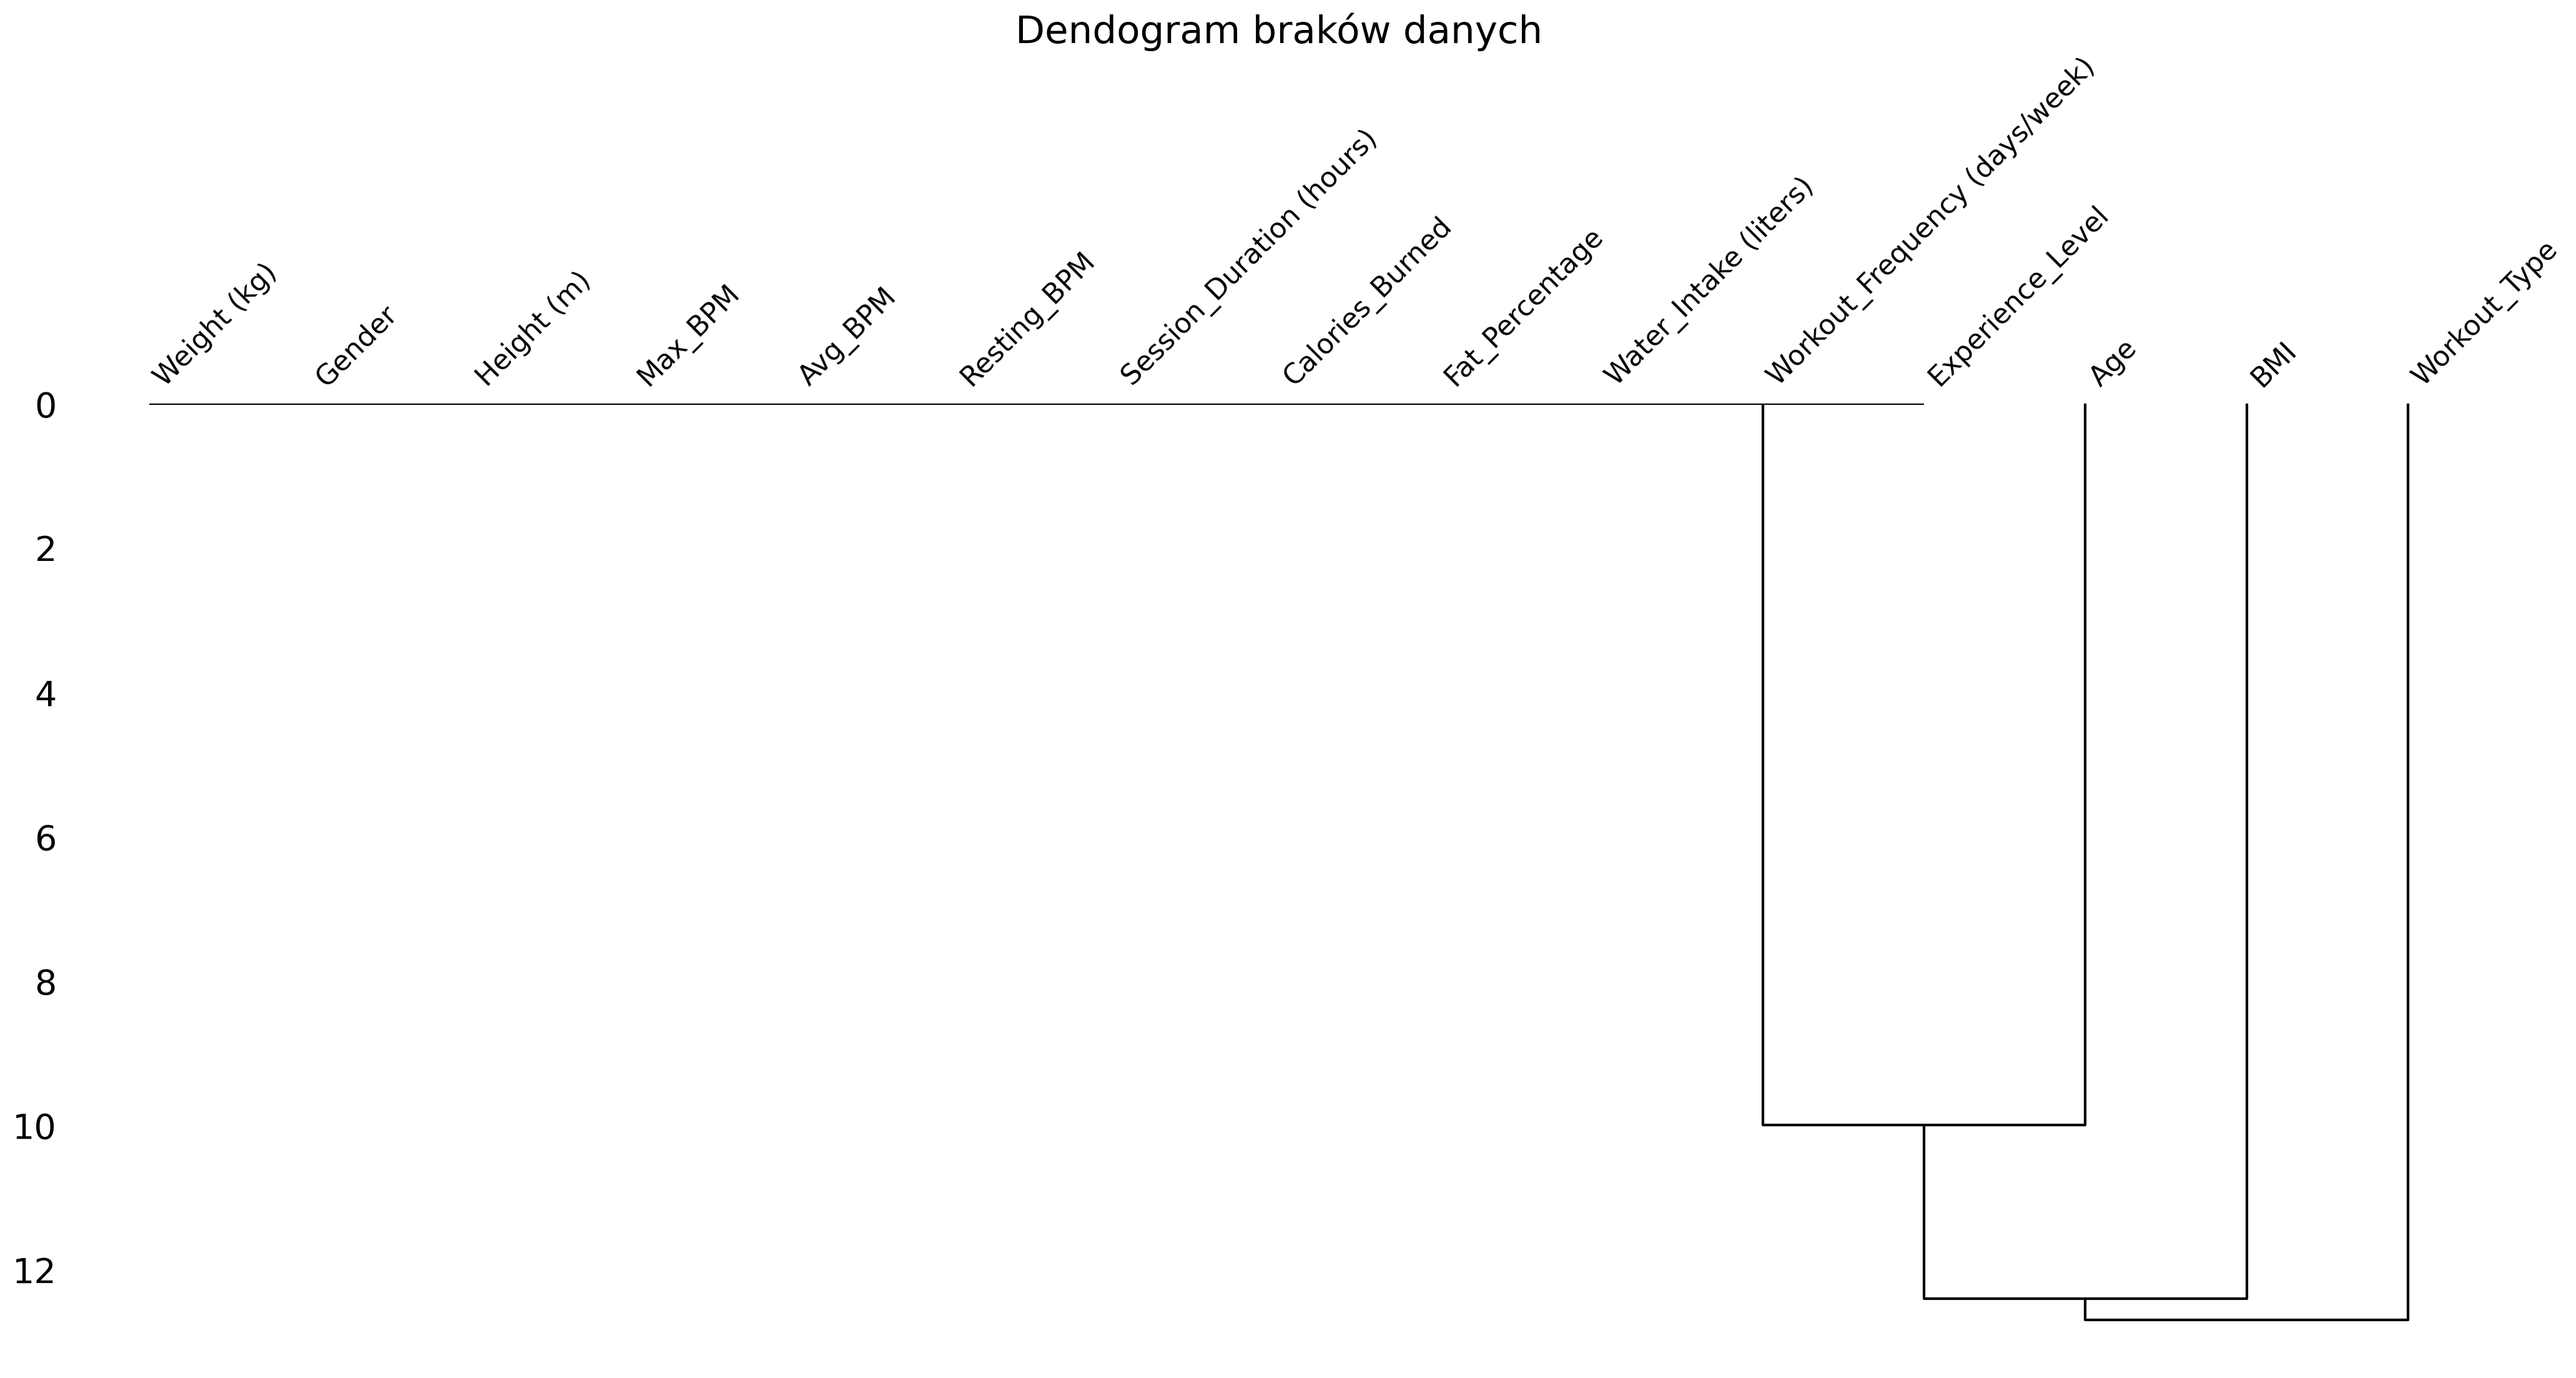

In [12]:
msno.dendrogram(df)
plt.title('Dendogram braków danych', size=22)

### 2.2.2 Bradanie obserwacji w kolumnach Age, BMI, Workout_Type oraz imputacja braków

Linie łączące kolumny pokazują, **jak podobne są wzorce braków** między nimi.
Im niżej (w pionie) łączą się kolumny, tym bardziej podobne są ich wzorce braków.
**Dystans bliski zeru** oznacza, że kolumny mają identyczny wzorzec braków (w naszym przypadku nie mają braków).
**Age, BMI, Workout_Type** mają zbliżony rozkład braków – często brakuje ich w tych samych wierszach.

In [ ]:
# # Import danych i wczytanie początkowych wartości

# import pandas as pd

# df_silownia = pd.read_csv('silownia_new.csv')

# print(df_silownia.head())

    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   NaN    Male         88.3        1.71      180      157           60   
1  46.0  Female         74.9        1.53      179      151           66   
2  32.0  Female         68.1        1.66      167      122           54   
3  25.0    Male         53.2        1.70      190      164           56   
4  38.0    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883          NaN            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

# 2. Czyszczenie i porządkowanie danych
*Diagnostyka danych; braki - wizualizacja, omówienie, wzorzec, błędy w danych i ich naprawa, imputacja braków, obserwacje odstające - analiza.*

In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np

In [3]:
# Opis danych
df_silownia.info()
# Statystyki opisowe
df_silownia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,873.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,823.000000
mean,38.626575,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.816549
std,12.273464,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.600485
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.105000
50%,39.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,23.940000
75%,50.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.450000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,47.720000


In [4]:
# W jakich kolumnach są wartośći brakujące
df_silownia.isna().head(1)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Brakuje wartości w Age, Workout_Type i BMI, co było juz widać wyzej, w info. 
Brakuje 100 w Age i po 150 w Workout_Type i BMI.

<Axes: >

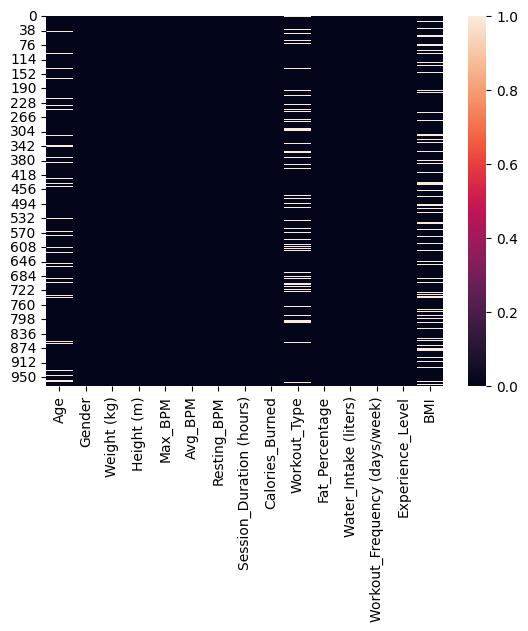

In [5]:
# Wizualizacja braków
sns.heatmap(df_silownia.isna())

<Axes: >

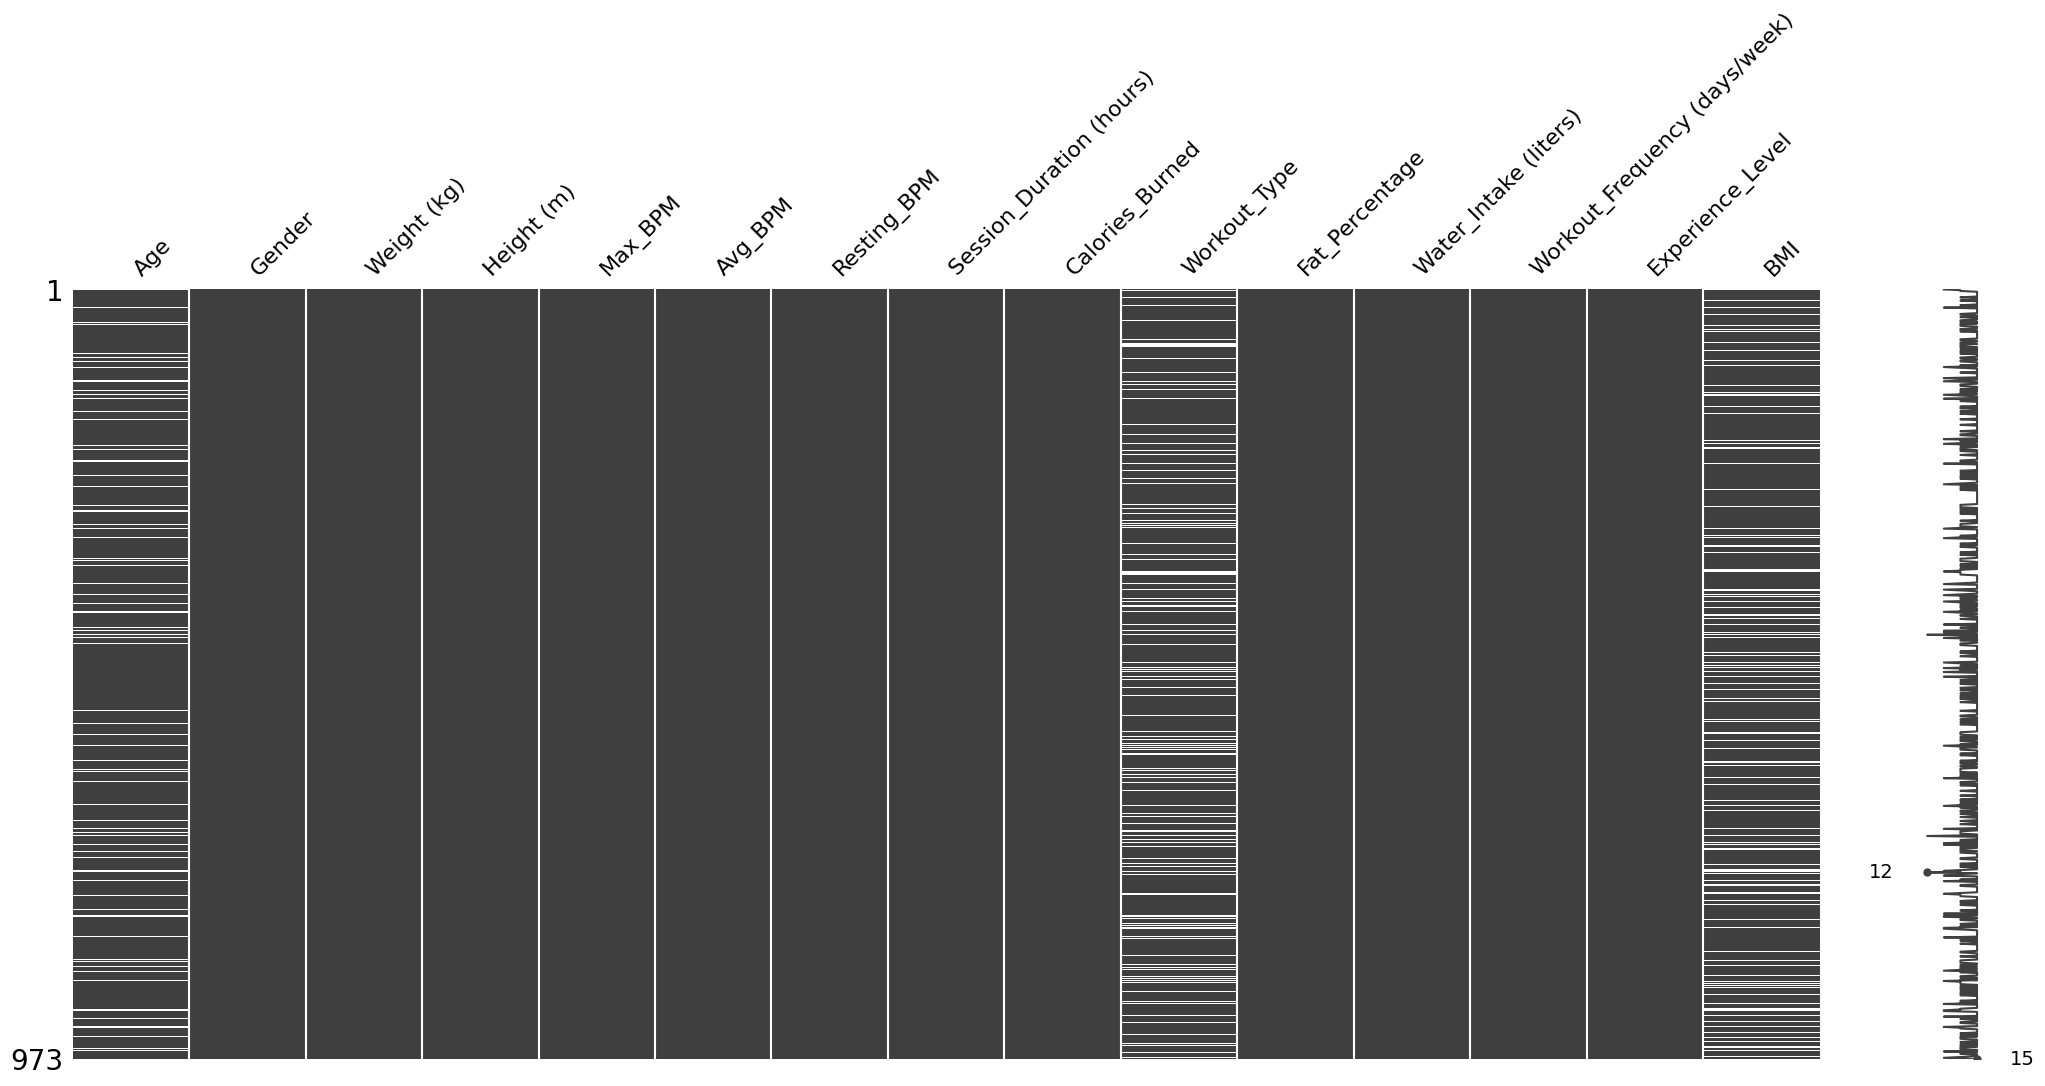

In [6]:
# Znalezienie przyczyny braku danych przy użyciu wykresu macierzowego
import missingno as msno
msno.matrix(df_silownia)

<Axes: >

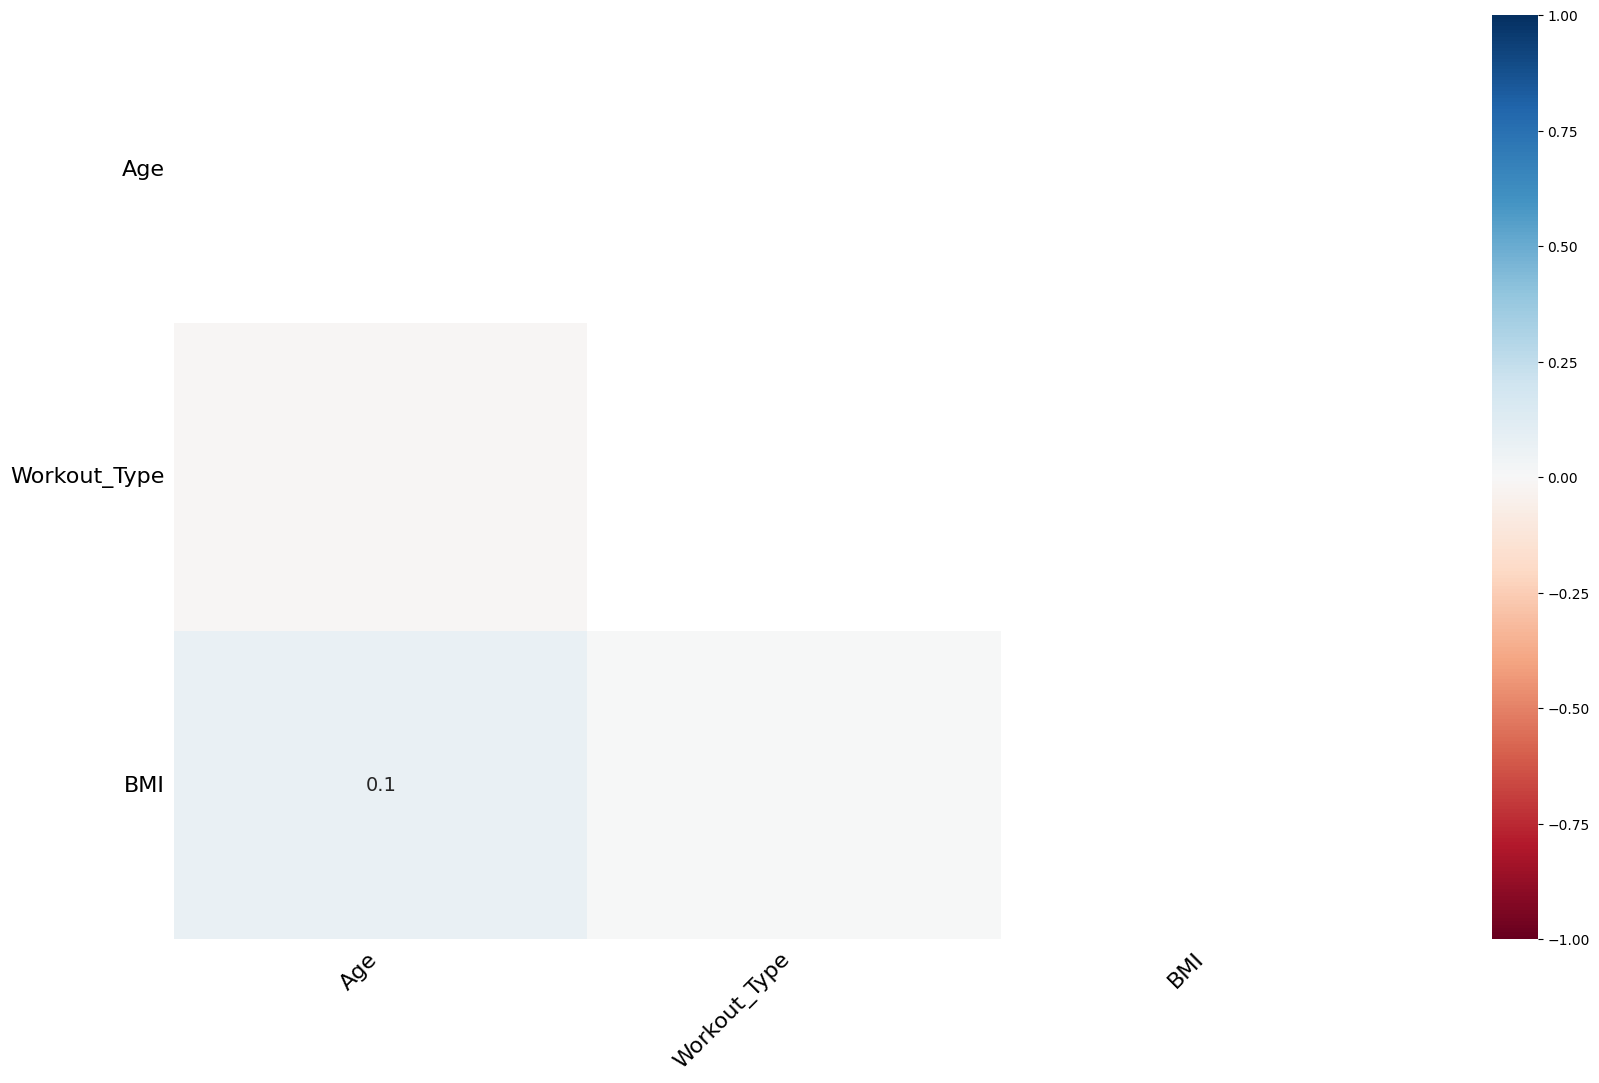

In [7]:
# Znalezienie przyczyny brakujących danych przy użyciu Heatmapy
msno.heatmap(df_silownia)

<Axes: >

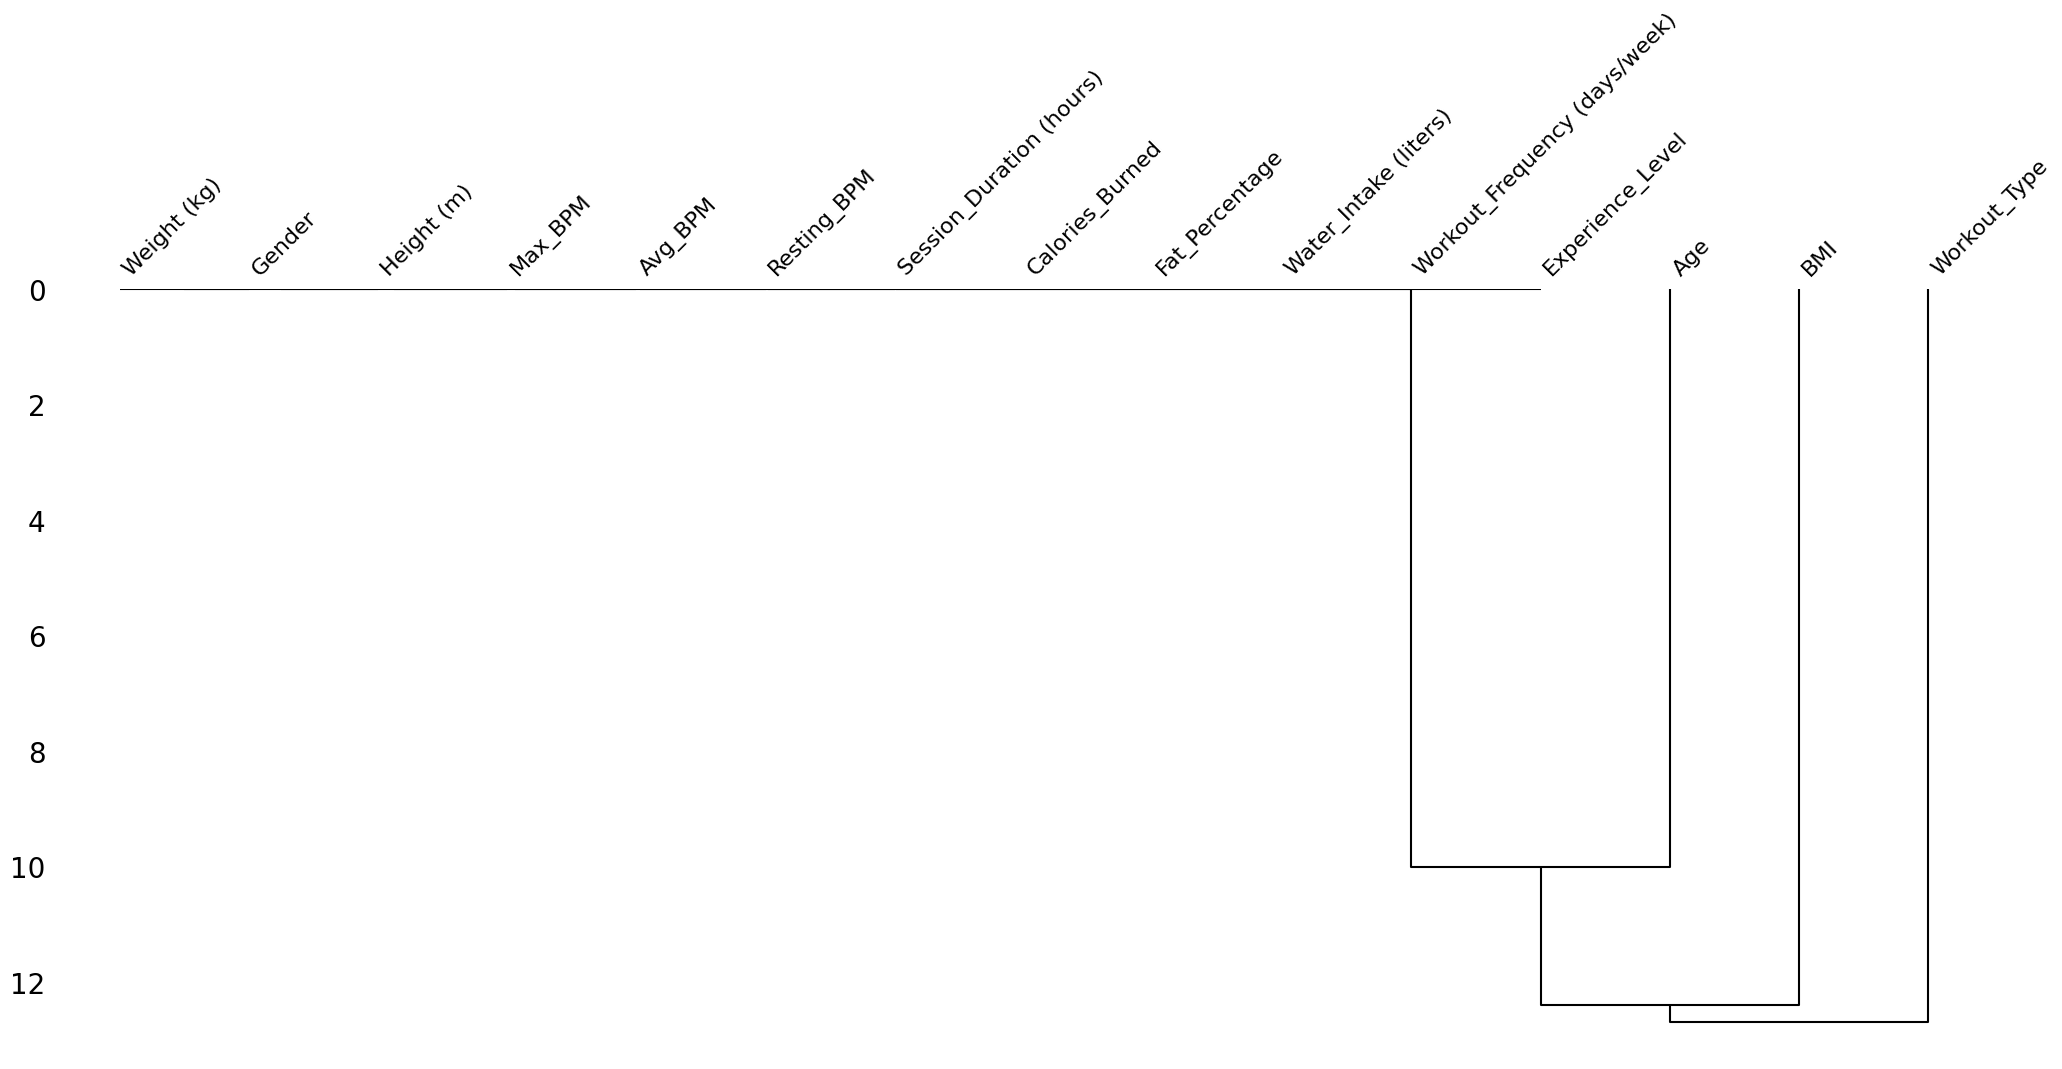

In [8]:
# Znajdowanie przyczyny braku danych przy użyciu dendrogramu

msno.dendrogram(df_silownia)

Niska korelacja wskazuje na braki typu MAR.
Ponieważ w tym mechanizmie występuje związek, najlepszą opcją byłoby zastosowanie techniki imputacji - średniej, mediany, trybu lub wielokrotnej imputacji.

In [9]:
# Imputacja brakujących danych przy użyciu KNN

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Kopia danych, żeby nie nadpisać oryginału
df_knn = df_silownia.copy()

# Zakodowanie workout_type (kategorie = liczby)
le = LabelEncoder()
df_knn['Workout_Type_encoded'] = le.fit_transform(df_knn['Workout_Type'].astype(str))

# Kolumny do imputacji
cols = ['Age', 'BMI', 'Workout_Type_encoded']

# Imputer KNN 
imputer = KNNImputer(n_neighbors=20)
df_knn[cols] = imputer.fit_transform(df_knn[cols])

# Odkodowanie workout_type
df_knn['Workout_Type'] = le.inverse_transform(df_knn['Workout_Type_encoded'].round().astype(int))
df_knn = df_knn.drop(columns='Workout_Type_encoded')

# Sprawdenie braków danych po imputacji
print(df_knn[['Age', 'BMI', 'Workout_Type']].isnull().sum())

Age             0
BMI             0
Workout_Type    0
dtype: int64


# 3. Wizualizacje
*4-5 wykresów przedstawiających określone wzorce lub cechy, które chcesz podkreślić. Każdej wizualizacji powinien towarzyszyć krótki (1-2 zdania) opis tego, co według Ciebie pokazuje.*

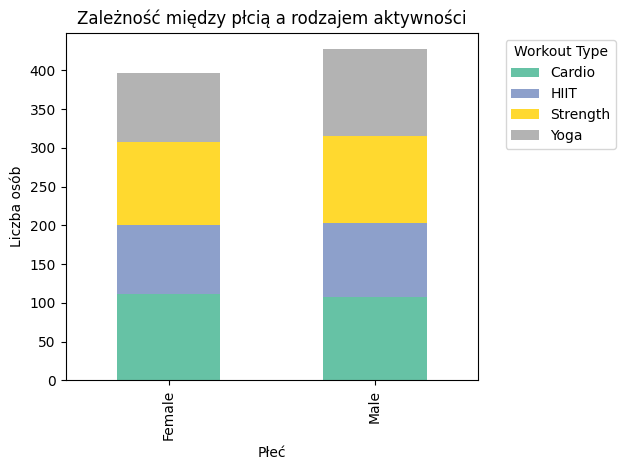

In [10]:
import matplotlib.pyplot as plt

# Tabela zależności
ct = pd.crosstab(df_silownia['Gender'], df_silownia['Workout_Type'])

# Wykres skumulowany
ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Zależność między płcią a rodzajem aktywności')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interpretacja: Kobiety częściej wybierają cardio, a mężczyźni siłownię i treningi mieszane oraz jogę. Jednak rónice są niewielkie.

Text(45.11413975694444, 0.5, 'Liczba spalonych kalorii')

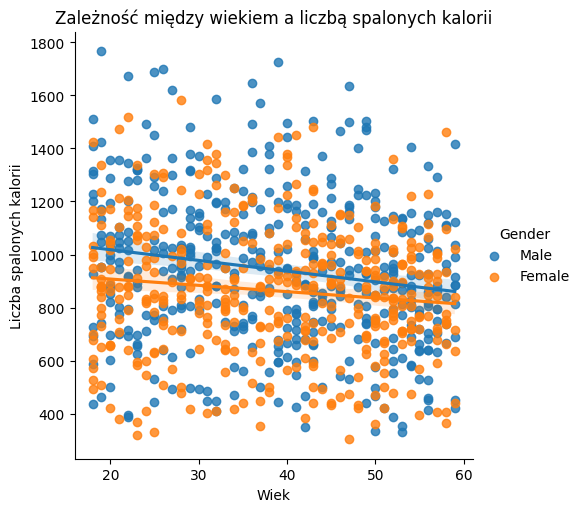

In [11]:
# Czy wiek wpływa na liczbę spalonych kalorii?

sns.lmplot(data=df_silownia, x='Age', y='Calories_Burned', hue='Gender')
plt.title('Zależność między wiekiem a liczbą spalonych kalorii')
plt.xlabel('Wiek')
plt.ylabel('Liczba spalonych kalorii')

Interpretacja: Wraz z wiekiem można zauważyć spadek intensywności spalania kalorii. U kobiet wydaje się być delikatniejszy, u męczyzn rónica jest większa, ale nadal nie drastyczna.

Text(43.190944444444426, 0.5, 'Średnie tętno (BPM)')

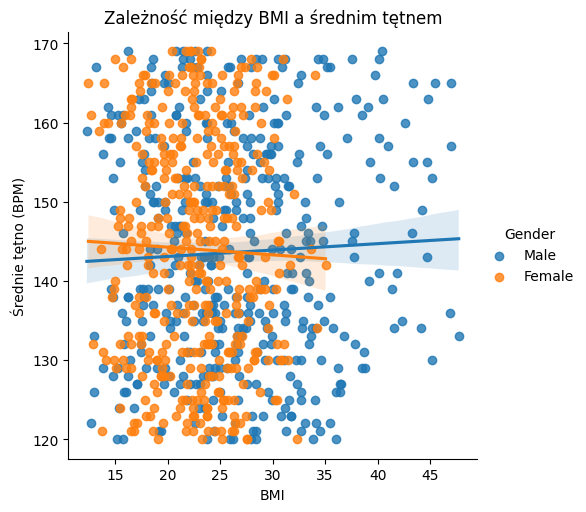

In [12]:
# Czy BMI wpływa na średnie tętno?

sns.lmplot(data=df_silownia, x='BMI', y='Avg_BPM', hue='Gender')
plt.title('Zależność między BMI a średnim tętnem')
plt.xlabel('BMI')
plt.ylabel('Średnie tętno (BPM)')

Interpretacja: Widać, że u męzczyzn, wraz ze wzrostem BMI średnie tętno rośnie, co może sugerować większe obciążenie organizmu. U kobiet sytuacja jest odwrotna. Moze im mają większe BMI, tym mniej intensywne treningi wykoują.

/var/folders/mv/gl_0swbd1d7b76j07453s1n80000gn/T/ipykernel_17248/3344823215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')


Text(0.5, 0, 'Poziom doświadczenia')

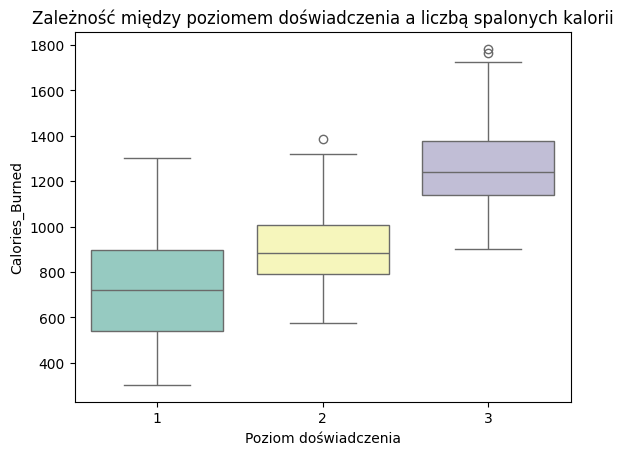

In [13]:
# Zalezność między poziomem doświadczenia a liczbą spalonych kalorii
sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')
plt.title('Zależność między poziomem doświadczenia a liczbą spalonych kalorii')
plt.xlabel('Poziom doświadczenia')

Interpretacja: Bardziej zaawansowani użytkownicy spalają więcej kalorii, ale z większym rozrzutem wyników.


/var/folders/mv/gl_0swbd1d7b76j07453s1n80000gn/T/ipykernel_17248/1287331168.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_silownia, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', ci=None)


Text(0, 0.5, 'Spożycie wody (litry)')

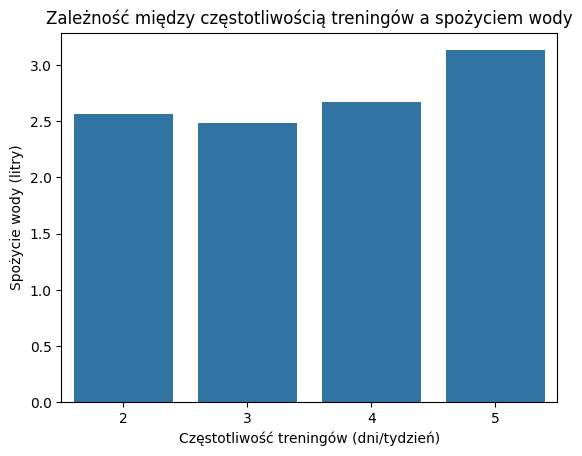

In [14]:
# Zależność między częstotliwością treningów a spożyciem wody

sns.barplot(data=df_silownia, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', ci=None)
plt.title('Zależność między częstotliwością treningów a spożyciem wody')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Spożycie wody (litry)')

Interpretacja: Osoby trenujące częściej wypijają średnio więcej wody.


# 4. Analiza opisowa
*2-3 analizy opisowe, odnoszące się do pytania badawczego (pytań). Każdej analizie powinna towarzyszyć krótka (1-3 zdania) interpretacja.*

Pytania badawcze

Czy płeć wpływa na wybór rodzaju aktywności fizycznej?
Czy wiek, poziom doświadczenia i częstotliwość treningów mają wpływ na spalanie kalorii?
Czy osoby o wyższym BMI mają wyższe tętno spoczynkowe lub niższą wydolność (niższy max BPM)?

In [15]:
# Zależność między rodzajem aktywności a średnim BMI

df_silownia.groupby('Workout_Type')['BMI'].mean()    

Workout_Type
Cardio      25.064709
HIIT        24.885342
Strength    24.766461
Yoga        24.531420
Name: BMI, dtype: float64

In [16]:
# Zaleznosc między płcią a poziomem doświadczenia

df_silownia.groupby('Gender')['Experience_Level'].mean()

Gender
Female    1.807359
Male      1.812133
Name: Experience_Level, dtype: float64

Interpretacja: Mężczyźni w tym zbiorze mają nieco wyższy poziom doświadczenia treningowego niż kobiety.

In [17]:
#Czy osoby z wysokim Fat_Percentage mają niższą aktywność?

df_silownia['High_Fat'] = df_silownia['Fat_Percentage'] > df_silownia['Fat_Percentage'].median()
df_silownia.groupby('High_Fat')['Workout_Frequency (days/week)'].mean()


High_Fat
False    3.631902
True     3.008264
Name: Workout_Frequency (days/week), dtype: float64

Interpretacja: Osoby z wyższym poziomem tłuszczu trenują rzadziej niż osoby z niższym.

# 5. Wnioskowanie statystyczne
*Odnoszące się do pytań badawczych testy statystyczne (w tabeli lub na wizualizacjach) odpowiednie do załozeń, danych.*

# 6. Wnioski
*Wyciągnięcie wniosków na temat zbioru danych i postawionych pytań.*